### SPH6004 Assignment 1 

#### Objective
- To build a predictor that estimates the patients’ chance of intubation in the ICU
- Propose and implement a strategy to select the right features for the predictive model
1. Clearly explain the rationale of the proposed strategy
2. Clearly explain how the proposed strategy works
3. Demonstrate experimentally how the proposed strategy manages to minimise the feature dimensions of the pre-extracted MIMIC data

- With the selected features, implement the predictive models taught in first half of the course and compare their performances in estimating the patients’ chance of intubation in the ICU
1. Implement all predictive models correctly
2. Evaluate and compare performance of the models
3. Clearly explain the better performance of some models

### Problem Statement
This dataset is obtained from the MIMIC-IV database, and contains information on health vitals, clinical laboratory values, and clinical assessment scores for a cohort of patients in the intensive care unit (ICU). The goal of this study is to develop and validate a prediction model that estimates the patients' likelihood of intubation in the ICU.

### Overview and Methodology
Before the prediction model can be developed, it is necessary to first understand the data and determine if any pre-processing needs to be carried out. Feature selection to select for the most relevant and optimal features that can explain the outcome (i.e. intubation) will also be performed. Once the set of important features are determined, hyperparameter tuning will be carried out to identify the optimal model design for machine learning. Different machine learning methods will be explored and their model performances compared to decide on the best performing models. This set of codes can be found on github: https://github.com/desmondteoch/SPH6004.

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\desmo\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\desmo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\desmo\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_excel('Assignment_1_data.xlsx')

In [3]:
pd.set_option("display.max_columns", None)
df.head(10)

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,temperature_min,temperature_max,temperature_mean,lactate_min,lactate_max,ph_min,ph_max,chloride_min,chloride_max,calcium_min,calcium_max,sodium_min,sodium_max,glucose_min,glucose_max,wbc_min,wbc_max,creatinine_min,creatinine_max,hemoglobin_min,hemoglobin_max,total_protein_max,total_protein_min,pt_min,pt_max,alt_max,alt_min,alp_max,alp_min,ast_min,ast_max,bilirubin_total_max,bilirubin_total_min,bilirubin_direct_max,bilirubin_direct_min,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,125.433333,30.0,83.0,65.600000,36.78,37.56,37.055000,0.9,8.2,7.27,7.47,104.0,110.0,1.01,1.11,136.0,139.0,112.0,122.0,11.6,11.6,1.2,1.7,8.9,8.9,NaN,NaN,13.2,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,109.434783,49.0,85.0,59.652174,36.39,36.94,36.798000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,356.0,7.4,8.4,1.4,1.5,12.6,13.3,NaN,NaN,9.9,11.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,111.130435,55.0,81.0,67.173913,36.50,37.28,36.796667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.0,115.0,4.3,7.0,0.6,0.7,6.9,7.1,NaN,NaN,15.2,15.3,35.0,35.0,57.0,57.0,54.0,54.0,1.1,1.1,NaN,NaN,NaN,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,122.166667,53.0,93.0,66.722222,36.67,36.83,36.750000,2.3,2.3,7.35,7.35,NaN,NaN,NaN,NaN,NaN,NaN,149.0,156.0,13.0,18.1,1.3,1.6,11.8,12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,90.028571,25.0,80.0,50.771429,36.28,38.11,37.022857,0.8,1.2,7.23,7.33,NaN,NaN,NaN,NaN,NaN,NaN,102.0,104.0,9.4,11.7,3.4,4.0,10.2,12.7,NaN,NaN,12.6,13.4,61.0,45.0,139.0,109.0,126.0,186.0,0.9,0.8,NaN,NaN,NaN,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
5,F,24.131524,82.0,111.0,95.640000,53.0,113.0,77.520000,86.0,136.0,115.000000,45.0,109.0,67.240000,36.28,36.83,36.648333,1.0,1.1,7.06,7.45,121.0,121.0,NaN,NaN,138.0,138.0,141.0,670.0,5.8,7.8,0.4,0.9,11.7,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,NaN,0.0,NaN,1.0,0.0,0.0,1,False
6,M,68.308897,60.0,80.0,71.083333,63.0,112.0,75.720000,87.0,153.0,104.160000,47.0,87.0,59.760000,35.89,37.06,36.466250,0.9,1.3,7.37,7.49,106.0,109.0,1.09,1.18,137.0,138.0,139.0,139.0,11.1,16.1,0.7,0.8,8.8,12.7,NaN,NaN,12.6,14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2560.0,1.0,1.0,NaN,1.0,1.0,0.0,3,False
7,F,57.433933,62.0,92.0,75.240000,65.0,97.0,78.160000,88.0,125.0,103.080000,53.0,90.0,66.720000,36.61,37.06,36.771250,1.4,1.4,7.47,7.47,NaN,NaN,NaN,NaN,NaN,NaN,92.0,150.0,2.3,3.3,0.6,0.6,10.0,10.0,NaN,NaN,15.7,16.4,15.0,14.0,77.0,67.0,27.0,31.0,0.6,0.6,NaN,NaN,NaN,NaN,2200.0,NaN,2.0,0.0,3.0,0.0,0.0,4,False
8,M,62.564975,48.0,87.0,59.000000,56.0,86.0,71.954545,104.0,140.0,122.090909,41.0,71.0,56.545455,36.61,37.44,36.854000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,99.0,8.9,8.9,0.7,0.7,13.2,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.0,NaN,1.0,NaN,1.0,0.0,0.0,4,False
9,M,66.238225,61.0,80.0,69.750000,61.0,92.0,74.958333,93.0,127.0,109.125000,49.0,88.0,66.166667,35.83,38.50,37.292857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.0,145.0,18.2,21.7,1.5,2.1,12.3,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.0,NaN,0.0,NaN,1.0,0.0,2.0,7,False


In [4]:
df.shape

(36489, 60)

In [5]:
df.duplicated().sum()

## assume no duplicated pats

0

### EDA

In [6]:
#examine numerical cols
pd.set_option("display.max_columns", None)
df.describe()

## age -- generally older pats
## all vitals, measures and scores seem to be within clinically expected ranges

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,dbp_mean,temperature_min,temperature_max,temperature_mean,lactate_min,lactate_max,ph_min,ph_max,chloride_min,chloride_max,calcium_min,calcium_max,sodium_min,sodium_max,glucose_min,glucose_max,wbc_min,wbc_max,creatinine_min,creatinine_max,hemoglobin_min,hemoglobin_max,total_protein_max,total_protein_min,pt_min,pt_max,alt_max,alt_min,alp_max,alp_min,ast_min,ast_max,bilirubin_total_max,bilirubin_total_min,bilirubin_direct_max,bilirubin_direct_min,bilirubin_indirect_max,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36417.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,36341.000000,36341.000000,36341.000000,36126.000000,36126.000000,36126.000000,15930.000000,15930.000000,18860.000000,18860.000000,6129.000000,6129.000000,9289.000000,9289.000000,6554.000000,6554.000000,36191.000000,36191.000000,36235.000000,36235.000000,36291.000000,36291.000000,36232.000000,36232.000000,974.000000,974.000000,32345.000000,32345.000000,18663.000000,18663.000000,18580.000000,18580.000000,18776.000000,18776.000000,18590.000000,18590.000000,1605.000000,1605.000000,1544.000000,1544.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,65.907162,70.935003,103.109572,84.855578,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,47.379860,90.387455,64.540082,36.348090,37.296027,36.813596,1.640498,2.360345,7.345907,7.406615,103.243172,105.369457,1.085834,1.169765,134.799735,136.628792,117.663729,167.322815,10.181060,13.145738,1.330352,1.591678,10.293279,11.393038,6.041376,6.017248,14.944678,17.063756,122.738279,83.877431,124.666954,115.245748,101.127333,168.799585,1.705939,1.495632,3.393146,3.213832,1.855894,1.742163,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,16.797498,15.064109,20.682937,15.977454,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,11.853837,20.183779,11.661638,0.548462,0.622069,0.416853,1.031029,1.704819,0.089457,0.070243,6.014638,6.219704,0.097465,0.127002,5.928459,5.776729,39.923837,113.182968,7.792171,11.082715,1.466693,1.847420,2.280191,2.172428,1.070641,1.038513,6.630633,11.251566,790.533967,395.349826,134.923888,119.240334,460.282124,947.025745,4.099623,3.711757,5.299470,5.110260,2.293747,2.219434,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,18.002527,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,1.000000,29.000000,29.000000,22.000000,33.400000,33.191304,0.000000,0.200000,6.700000,6.810000,3.400000,3.400000,0.400000,0.610000,1.360000,5.100000,7.000000,7.000000,0.100000,0.100000,0.100000,0.100000,2.200000,3.700000,2.000000,2.000000,8.000000,8.000000,1.000000,1.000000,7.000000,7.000000,2.000000,2.000000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.549252,60.000000,88.000000,73.321429,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,40.000000,76.000000,56.344828,36.170000,36.940000,36.601429,1.000000,1.300000,7.300000,7.360000,101.000000,103.000000,1.040000,1.090000,133.000000,135.000000,93.000000,113.000000,6.600000,8.300000,0.700000,0.800000,8.600000,9.800000,5.400000,5.400000,11.900000,12.300000,15.000000,15.000000,65.000000,62.000000,20.000000,22.000000,0.400000,0.400000,0.600000,0.500000,0.500000,0.500000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,67.439033,70.000000,101.000000,83.500000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,47.000000,88.000000,63.304348,36.440000,37.170000,36.792857,1.400000,1.900000,7.350000,7.410000,104.000000,106.000000,1.090000,1.160000,135.000000,137.000000,109.000

In [7]:
#examine categorical cols
df.gender.value_counts(normalize=True)

## slightly more males

M    0.544822
F    0.455178
Name: gender, dtype: float64

In [8]:
#examine outcome
df.outcome.value_counts()

## imbalanced data

False    35160
True      1329
Name: outcome, dtype: int64

### Description of dataset
The dataset contains 36,489 records with a total of 59 features and 1 binary outcome (for intubation).

The outcome is significantly imbalanced with only 1,329 (3.6%) 'True' labels.

Among the 59 input features, there are a few distinct categories of data, where possible feature selection by filtering can be explored.

* <b>Demographic data</b>: 'gender', 'age'
* <b>Health vitals</b>: <i>(heart rate)</i> 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean'; <i>(blood pressure)</i> 'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min', 'dbp_max', 'dbp_mean'; <i>(temperature)</i> 'temperature_min', 'temperature_max', 'temperature_mean'
* <b>Laboratory values</b>: 'lactate_min', 'lactate_max', 'ph_min', 'ph_max', 'chloride_min', 'chloride_max', 'calcium_min', 'calcium_max', 'sodium_min', 'sodium_max', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min', 'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'total_protein_max', 'total_protein_min', 'pt_min', 'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min', 'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'bilirubin_direct_max', 'bilirubin_direct_min', 'bilirubin_indirect_max', 'bilirubin_indirect_min'
* <b>Clinical measures</b>: 'urineoutput'
* <b>Scoring assessments</b>: 'sofa_respiration', 'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns', 'sofa_renal', 'charlson_comorbidity_index'

Feature selection by filtering will be first be carried out in the following steps:

<b>(1) Examine missingness of dataset</b>
* Proportion of missing data for each feature to be determined
* Features with significant amount of missing data to be removed

<b>(2) Examine relatedness/collinearity amongst features</b>
* A correlation matrix can be plotted to visualise the relationships amongst input features, and those which are highly associated with each other (either positively or negatively) could be considered for removal.
* The aim here would be to reduce the feature space so as to avoid overfitting the data, reduce time for model training, and also improve the accuracy of the models.

In [9]:
#check % of missing data for each col
df.isnull().mean()*100
 
## drop cols where >70% of data is missing, except sofa_respiration
## as might be clinically relevant to risk of intubation

gender                         0.000000
age                            0.000000
heart_rate_min                 0.197320
heart_rate_max                 0.197320
heart_rate_mean                0.197320
mbp_min                        0.241169
mbp_max                        0.241169
mbp_mean                       0.241169
sbp_min                        0.400121
sbp_max                        0.400121
sbp_mean                       0.400121
dbp_min                        0.405602
dbp_max                        0.405602
dbp_mean                       0.405602
temperature_min                0.994820
temperature_max                0.994820
temperature_mean               0.994820
lactate_min                   56.343007
lactate_max                   56.343007
ph_min                        48.313190
ph_max                        48.313190
chloride_min                  83.203157
chloride_max                  83.203157
calcium_min                   74.543013
calcium_max                   74.543013


In [10]:
#drop cols with large % of missing data (>70%)
df2 = df.drop(columns=['chloride_min','chloride_max',
                      'calcium_min','calcium_max',
                      'sodium_min','sodium_max',
                      'total_protein_max','total_protein_min',
                      'bilirubin_direct_max','bilirubin_direct_min',
                      'bilirubin_indirect_max','bilirubin_indirect_min'
                      ])

#### <b>(1) Remove features with significant missing data</b>

A total of 12 features were selected for removal due to significant amount of missing data (>70%). This brings the number of features down to 47.

A correlation matrix was plotted for these remaining features.

<AxesSubplot:>

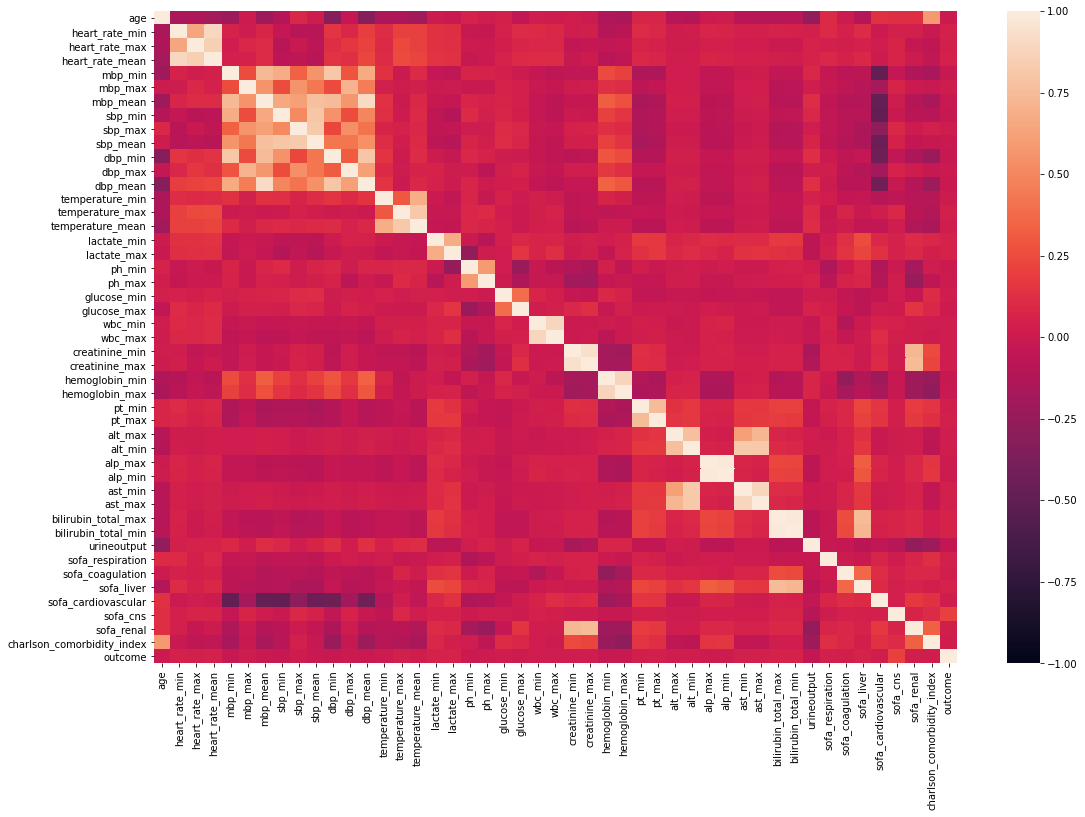

In [11]:
#correlation matrix
%matplotlib inline
cor = df2.corr()

plt.figure(figsize=(18,12))
sns.heatmap(cor, annot=False, vmin=-1.0, vmax=1.0)

In [12]:
#find correlated features
def find_corr(df, threshold):
    col_pairs = []
    corr = df.corr()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold and abs(corr.iloc[i,j]) != 1:
                col_pair = (corr.columns[i], corr.index[j])
                col_pairs.append(col_pair)
    return col_pairs

correlated_features = find_corr(df2, 0.85) #threshold empirically chosen
correlated_features

[('heart_rate_mean', 'heart_rate_min'),
 ('dbp_mean', 'mbp_mean'),
 ('wbc_max', 'wbc_min'),
 ('creatinine_max', 'creatinine_min'),
 ('hemoglobin_max', 'hemoglobin_min'),
 ('alp_min', 'alp_max'),
 ('ast_max', 'ast_min'),
 ('bilirubin_total_min', 'bilirubin_total_max')]

#### (2) Observations from correlation plot
An empirical threshold of 0.85 was chosen to determine highly correlated features. From the pairs of correlated features identified, only one of each pair was preserved and the other was dropped. The decision to drop which feature was based on which of the two would be more clinically relevant to the outcome of intubation. Further explanation as below.

<b>2.1 Cardiovascular features</b>
* 'heart_rate_min' was preserved over 'heart_rate_mean' to reflect the possibility of bradycardia leading to hypoxia and thus possibly indicating intubation.
* 'mbp_mean' was preserved over 'dbp_mean' as MBP is a function of SBP and DBP.

<b>2.2 Renal features</b>
* 'creatinine_max' was preserved over 'creatinine_min' to reflect the severity of renal impairment.

<b>2.3 Liver features</b>
* 'alp_max', 'ast_max' and 'bilirubin_total_max' was preserved over 'alp_min', 'ast_min' and 'bilirubin_total_min' to reflect the severity of hepatic impairment.

<b>2.4 Blood features</b>
* 'hemoglobin_min' was preserved over 'hemoglobin_max' to reflect possible anemic states in patients.
* 'wbc_max' was preserved over 'wbc_min' to reflect the septic state of patients.

In [13]:
#drop highly correlated features
df3 = df2.drop(columns=['heart_rate_mean','dbp_mean','creatinine_min','hemoglobin_max',
                        'wbc_min','alp_min','ast_min','bilirubin_total_min'
                       ]) 

The combination of Steps 1 and 2 reduced the number of features from 59 to <b>39</b>.

In [14]:
print(df3.columns, '\n\n', f'Number of columns: {len(df3.columns)}')

Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'mbp_min',
       'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean', 'dbp_min',
       'dbp_max', 'temperature_min', 'temperature_max', 'temperature_mean',
       'lactate_min', 'lactate_max', 'ph_min', 'ph_max', 'glucose_min',
       'glucose_max', 'wbc_max', 'creatinine_max', 'hemoglobin_min', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'ast_max',
       'bilirubin_total_max', 'urineoutput', 'sofa_respiration',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index', 'outcome'],
      dtype='object') 

 Number of columns: 40


#### Feature Selection Part 2
* With the reduced number of features after filtering, further pre-processing will be performed on the remaining features.
* Missing data will be imputed with either the mean or median. If the mean is numerically close to the median, then the missing values will be replaced with the mean. Otherwise, the median would be used.
* A logistic regression model with L1 regularisation will then be used to further select optimal features for model building.

In [15]:
#look at proportion of missing data again
df3.isnull().mean()*100

##'gender', 'age', 'charlson_comorbidity_index' have no missing data

gender                         0.000000
age                            0.000000
heart_rate_min                 0.197320
heart_rate_max                 0.197320
mbp_min                        0.241169
mbp_max                        0.241169
mbp_mean                       0.241169
sbp_min                        0.400121
sbp_max                        0.400121
sbp_mean                       0.400121
dbp_min                        0.405602
dbp_max                        0.405602
temperature_min                0.994820
temperature_max                0.994820
temperature_mean               0.994820
lactate_min                   56.343007
lactate_max                   56.343007
ph_min                        48.313190
ph_max                        48.313190
glucose_min                    0.816684
glucose_max                    0.816684
wbc_max                        0.696100
creatinine_max                 0.542629
hemoglobin_min                 0.704322
pt_min                        11.356847


In [16]:
#refactor gender to binary
df3['gender'] = df3['gender'].replace({'M':1, 'F':0})

In [17]:
#examine numerical cols again
pd.set_option("display.max_columns", None)
df3.describe()

,gender,age,heart_rate_min,heart_rate_max,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,dbp_min,dbp_max,temperature_min,temperature_max,temperature_mean,lactate_min,lactate_max,ph_min,ph_max,glucose_min,glucose_max,wbc_max,creatinine_max,hemoglobin_min,pt_min,pt_max,alt_max,alt_min,alp_max,ast_max,bilirubin_total_max,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index
count,36489.000000,36489.000000,36417.000000,36417.000000,36401.000000,36401.000000,36401.000000,36343.000000,36343.000000,36343.000000,36341.000000,36341.000000,36126.000000,36126.000000,36126.000000,15930.000000,15930.000000,18860.000000,18860.000000,36191.000000,36191.000000,36235.000000,36291.000000,36232.000000,32345.000000,32345.000000,18663.000000,18663.000000,18580.000000,18776.000000,18590.000000,35073.000000,7587.000000,36235.000000,18590.000000,36402.000000,36468.000000,36467.000000,36489.000000
mean,0.544822,65.907162,70.935003,103.109572,60.429777,105.484634,79.255689,94.449898,147.691412,119.757827,47.379860,90.387455,36.348090,37.296027,36.813596,1.640498,2.360345,7.345907,7.406615,117.663729,167.322815,13.145738,1.591678,10.293279,14.944678,17.063756,122.738279,83.877431,124.666954,168.799585,1.705939,1914.991284,1.723738,0.481109,0.514094,1.060381,0.915433,0.826501,5.798104
std,0.497994,16.797498,15.064109,20.682937,13.347348,23.346984,11.758700,16.705217,22.855348,17.220898,11.853837,20.183779,0.548462,0.622069,0.416853,1.031029,1.704819,0.089457,0.070243,39.923837,113.182968,11.082715,1.847420,2.280191,6.630633,11.251566,790.533967,395.349826,134.923888,947.025745,4.099623,1266.887914,0.588464,0.825034,0.963752,0.972511,1.050761,1.201510,3.014789
min,0.000000,18.002527,9.000000,36.000000,0.830000,51.000000,42.513889,2.000000,49.000000,40.000000,1.000000,29.000000,22.000000,33.400000,33.191304,0.000000,0.200000,6.700000,6.810000,7.000000,7.000000,0.100000,0.100000,2.200000,8.000000,8.000000,1.000000,1.000000,7.000000,2.000000,0.100000,-14850.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.549252,60.000000,88.000000,53.000000,91.000000,70.896552,83.500000,132.000000,107.096464,40.000000,76.000000,36.170000,36.940000,36.601429,1.000000,1.300000,7.300000,7.360000,93.000000,113.000000,8.300000,0.800000,8.600000,11.900000,12.300000,15.000000,15.000000,65.000000,22.000000,0.400000,1050.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000
50%,1.000000,67.439033,70.000000,101.000000,60.000000,102.000000,77.851852,93.000000,146.000000,117.678571,47.000000,88.000000,36.440000,37.170000,36.792857,1.400000,1.900000,7.350000,7.410000,109.000000,137.000000,11.400000,1.000000,10.300000,13.100000,13.900000,25.000000,23.000000,88.000000,35.000000,0.600000,1667.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,1.000000,78.729524,80.000000,115.000000,68.000000,115.000000,86.382353,104.000000,161.000000,130.649616,54.000000,101.000000,36.670000,37.560000,37.010000,1.900000,2.800000,7.410000,7.450000,132.000000,178.000000,15.700000,1.600000,11.900000,15.100000,16.800000,50.000000,45.000000,131.000000,71.250000,1.300000,2500.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,102.865603,163.000000,295.000000,133.000000,299.000000,151.529412,184.000000,352.000000,206.388889,113.000000,273.000000,38.560000,42.000000,39.517692,16.800000,29.000000,7.630000,7.830000,575.000000,2440.000000,407.200000,43.000000,19.300000,140.300000,154.600000,61854.000000,11680.000000,3358.000000,28580.000000,78.000000,31016.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000


In [18]:
#features where mean is close to median -- replace NaN with the mean

cols_replace_mean = ['heart_rate_min','heart_rate_max','mbp_min','mbp_max','mbp_mean','sbp_min',
                     'sbp_max','sbp_mean','dbp_min','dbp_max','temperature_min','temperature_max',
                     'temperature_mean','lactate_min','ph_min','ph_max','hemoglobin_min']

for col in cols_replace_mean:
    df3[col] = df3[col].fillna(df3[col].mean())

In [19]:
#remaining numerical features - distribution is skewed so to replace NaN with median to preserve skewness

cols_replace_median = ['lactate_max','glucose_min','glucose_max','wbc_max','creatinine_max',
                       'pt_min','pt_max','alt_max','alt_min','alp_max','ast_max','bilirubin_total_max', 
                       'urineoutput', 'sofa_respiration','sofa_coagulation','sofa_liver',
                       'sofa_cardiovascular','sofa_cns','sofa_renal']

for col in cols_replace_median:
    df3[col] = df3[col].fillna(df3[col].median())

#### Prepare data for embedded feature selection

In [20]:
#use sklearn for feature selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
#from sklearn.preprocessing import StandardScaler

X_raw = df3[df3.columns.difference(['outcome'])]
X = (X_raw-X_raw.mean())/X_raw.std()
y = df3.outcome

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=8,
                                                    stratify=df.outcome)

print(f'Training dataset: {X_train.shape}, {y_train.shape}')
print(f'Testing dataset: {X_test.shape}, {y_test.shape}')

Training dataset: (29191, 39), (29191,)
Testing dataset: (7298, 39), (7298,)


In [21]:
#fit model to LR and use lasso reg to select features
selector = SelectFromModel(LogisticRegression(C=0.01,
                                              penalty='l1',
                                              class_weight='balanced',
                                              random_state=8,
                                              solver='liblinear',
                                              max_iter=500
                                              ))
selector.fit(X_train, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight='balanced',
                                             max_iter=500, penalty='l1',
                                             random_state=8,
                                             solver='liblinear'))

In [22]:
#check features
selected_features = X_train.columns[(selector.get_support())]

print(f'Total no. of features: {X_train.shape[1]}')
print(f'No. of selected features: {len(selected_features)}')
print(f'Features with coeff shrank to zero: {np.sum(selector.estimator_.coef_==0)}')

Total no. of features: 39
No. of selected features: 28
Features with coeff shrank to zero: 11


In [23]:
#see which features were removed
removed_features = X_train.columns[(selector.estimator_.coef_==0).ravel().tolist()]
removed_features

Index(['alp_max', 'alt_min', 'ast_max', 'creatinine_max', 'dbp_min',
       'hemoglobin_min', 'mbp_mean', 'pt_min', 'sbp_mean', 'sofa_coagulation',
       'sofa_renal'],
      dtype='object')

In [24]:
#remove these features from training and test sets
X_train_sel = X_train.drop(columns=removed_features)
X_test_sel = X_test.drop(columns=removed_features)

print(f'Training dataset: {X_train_sel.shape}')
print(f'Testing dataset: {X_test_sel.shape}')

Training dataset: (29191, 28)
Testing dataset: (7298, 28)


In [25]:
y_train.value_counts()

False    28128
True      1063
Name: outcome, dtype: int64

#### Finalising feature selection

From the LASSO regularisation model, another 11 features were removed from the dataset. Hence, resulting in a finalised dataset with 28 features.

We will next perform hyperparameter tuning on this finalised dataset to find the optimal model parameters.

To account for the class imbalance, a combination of SMOTE to oversample the minority class (i.e. outcome='True') and Tomek to undersample the majority class (outcome='False') would be used.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.linear_model import SGDClassifier #SVM if hinge loss / LR if log loss
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
#initialise estimators and hyperparameters
parameters = [
    {
        'clf': [LogisticRegression(random_state=8, solver='liblinear')],
        'clf__C': [1e-3, 1e-2, 1e-1, 1],
        'clf__penalty': ['l1', 'l2'],
        'clf__class_weight': ['balanced'] 
    },  
    
    {
        'clf': [SVC(probability=False, random_state=8)],
        'clf__C': [1e-3, 1e-2, 1e-1],
        'clf__kernel': ['linear', 'poly', 'rbf'],
        'clf__class_weight': ['balanced']  
    },
    
    {
        'clf': [RandomForestClassifier(random_state=8)],
        'clf__max_depth': [5, 10, 25],
        'clf__min_samples_split': [2, 5],
        'clf__class_weight': ['balanced'],
        'clf__n_estimators': [10, 50, 100]
    },
    
    {
        'clf': [GradientBoostingClassifier(random_state=8)],
        'clf__max_depth': [5, 10, 25],
        'clf__n_estimators': [10, 50, 100]
    }
]

In [28]:
#make pipeline and initialise randomized search CV
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import StratifiedKFold

estimator = []
cv_result = []

for params in parameters:
    clf = params['clf'][0]
    params.pop('clf')
    resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    pipeline = Pipeline(steps=[('r', resample), ('clf', clf)])
    
    kf = StratifiedKFold(n_splits=5, shuffle=True)
    
    rs = RandomizedSearchCV(pipeline,
                            params,
                            cv=kf,
                            #n_iter=50,
                            n_jobs=-1,
                            scoring='accuracy',
                            verbose=3,
                            random_state=8,
                            error_score='raise'
                            )
    rs.fit(X_train_sel, y_train)
    
    estimator.append(
        {
        'classifier': rs.best_estimator_,
        'best score': rs.best_score_,
        'best params': rs.best_params_
        }
    )
    
    cv_result.append(rs.cv_results_)

C:\Users\desmo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\desmo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\desmo\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [29]:
from pprint import *

pprint(estimator)

[{'best params': {'clf__C': 0.001,
                  'clf__class_weight': 'balanced',
                  'clf__penalty': 'l1'},
  'best score': 0.7839402639315406,
  'classifier': Pipeline(steps=[('r',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('clf',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    penalty='l1', random_state=8,
                                    solver='liblinear'))])},
 {'best params': {'clf__C': 0.001,
                  'clf__class_weight': 'balanced',
                  'clf__kernel': 'poly'},
  'best score': 0.9525196108129522,
  'classifier': Pipeline(steps=[('r',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('clf',
                 SVC(C=0.001, class_weight='balanced', kernel='poly',
                     random_state=8))])},
 {'best params': {'clf__class_weight': 'balanced',
                  'clf__max_depth

#### Hyperparameter tuning
We used randomised search cross-validation for four different machine learning models: Logistic Regression (LRC), Support Vector Machine (SVM), Random Forest (RFC), and Gradient Boosting (GBC), to search for the optimal hyperparameters for each model.

The search results are printed in the cell above. These model parameters will next be added to an ensemble machine learning pipeline to build the final model for prediction.

#### Ensemble learning model
We will build a stacking ensemble model utilising the optimal hyperparameters obtained from Randomized Search for our four models. 5-fold cross validation will be performed during model training to determine the optimal stacking ensemble model. The results from cross validation are as shown below.

In [33]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_validate

clfs = ['LogisticRegression', 'SupportVectorMachine', 'RandomForest', 'GradientBoosting']
estimators = [LogisticRegression(C=0.001, class_weight='balanced', penalty='l1', random_state=8, solver='liblinear'),
              SVC(C=0.001, class_weight='balanced', kernel='poly', random_state=8),
              RandomForestClassifier(class_weight='balanced', max_depth=25, min_samples_split=2, n_estimators=100, random_state=8),
              GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=8)
             ]
scoring = ['accuracy','precision','recall','f1_macro','roc_auc']

def get_stacking(cv):
    base_model = [(clfs[i], estimators[i]) for i in range(len(clfs))]
    meta_model = LogisticRegression(C=0.001, class_weight='balanced', penalty='l2', random_state=8, solver='liblinear')
    resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
    stack_clf = StackingClassifier(estimators=base_model, 
                                   final_estimator=meta_model,
                                   cv=cv)
    stack_model = Pipeline(steps=[('r', resample), ('clf', stack_clf)])
    
    return stack_model

def get_models():
    models = {clfs[i]: estimators[i] for i in range(len(clfs))}
    models['StackingClassifier'] = get_stacking(5)
    
    return models

def evaluate_model(model, X, y, n_fold):
    folds = StratifiedKFold(n_splits=n_fold, random_state=8, shuffle=True)
    scores = cross_validate(model, X, y,
                            scoring=scoring,
                            cv=folds,
                            n_jobs=-1,
                            error_score='raise')
    return scores

In [34]:
#evaluate models
all_models = get_models()

model_results = []

for name, model in all_models.items():
    scores = evaluate_model(model, X_train_sel, y_train, 5)
    model_results.append(name)
    model_results.append(scores)

In [35]:
model_results #LRC as meta

['LogisticRegression',
 {'fit_time': array([0.05884337, 0.0568471 , 0.05636811, 0.06035757, 0.06534171]),
  'score_time': array([0.01695848, 0.01895404, 0.01595736, 0.01795149, 0.01097226]),
  'test_accuracy': array([0.78078438, 0.78074683, 0.77903392, 0.77269613, 0.77595067]),
  'test_precision': array([0.09735849, 0.10326895, 0.09776119, 0.09283626, 0.09948793]),
  'test_recall': array([0.6056338 , 0.65566038, 0.61792453, 0.59624413, 0.63849765]),
  'test_f1_macro': array([0.52075879, 0.52596334, 0.52069722, 0.5146033 , 0.52129782]),
  'test_roc_auc': array([0.73692105, 0.76871114, 0.74950826, 0.74028002, 0.75542452])},
 'SupportVectorMachine',
 {'fit_time': array([48.71872711, 48.66137028, 48.87198901, 48.91572261, 48.70078921]),
  'score_time': array([10.13458753, 10.12760735, 10.15508461, 10.18317056, 10.11562228]),
  'test_accuracy': array([0.9551293 , 0.95409387, 0.95118191, 0.9474135 , 0.95066804]),
  'test_precision': array([0.18181818, 0.20212766, 0.16513761, 0.15942029, 0.15

From cross-validation, the Stacking Classifer has a mean validation accuracy of 95%, which is better than both Logistic Regression alone (mean validation accuracy of about 78%). and comparable accuracies with SVM slone, Random Forest alone and Gradient Boosting alone.

To optimise the final model predictions, a stacking ensemble model will be developed which contains all four of our models as base learners at layer one, and a <b>Logistic Regression Model</b> with L2 regularisation as the meta learner at layer two. The key reason for choosing Logistic Regression at the meta-layer is to reduce the complexity and avoid overfitting of the predictions from the base models.

This Stacking Classifier is then fitted onto the full training data, and evaluated for its performance on testing data.

In [36]:
#fit stacking classifier
estimators = [
    ('LRC', LogisticRegression(C=0.001, class_weight='balanced', penalty='l1', random_state=8, solver='liblinear')),
    ('SVM', SVC(C=0.001, class_weight='balanced', kernel='poly', random_state=8)),
    ('RFC', RandomForestClassifier(class_weight='balanced', max_depth=25, min_samples_split=2, n_estimators=100, random_state=8)),
    ('GBC', GradientBoostingClassifier(max_depth=10, n_estimators=100, random_state=8))
]

final_estimator = LogisticRegression(C=0.001, class_weight='balanced', penalty='l2', random_state=8, solver='liblinear')

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
stack_clf = StackingClassifier(estimators=estimators,
                              final_estimator=final_estimator)

pipeline = Pipeline(steps=[('r', resample), ('clf', stack_clf)]) 

pipeline.fit(X_train_sel, y_train)

Pipeline(steps=[('r',
                 SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))),
                ('clf',
                 StackingClassifier(estimators=[('LRC',
                                                 LogisticRegression(C=0.001,
                                                                    class_weight='balanced',
                                                                    penalty='l1',
                                                                    random_state=8,
                                                                    solver='liblinear')),
                                                ('SVM',
                                                 SVC(C=0.001,
                                                     class_weight='balanced',
                                                     kernel='poly',
                                                     random_state=8)),
                                                ('RFC',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        max_depth=25,
                                                                        random_state=8)),
                                                ('GBC',
                                                 GradientBoostingClassifier(max_depth=10,
                                                                            random_state=8))],
                                    final_estimator=LogisticRegression(C=0.001,
                                                                       class_weight='balanced',
                                                                       random_state=8,
                                                                       solver='liblinear')))])

In [37]:
#predict on test set
y_pred = pipeline.predict(X_test_sel)
y_proba = pipeline.predict_proba(X_test_sel)

#### Evaluation metrics

In [38]:
from sklearn.metrics import *

Confusion Matrix for Stacking Classifier


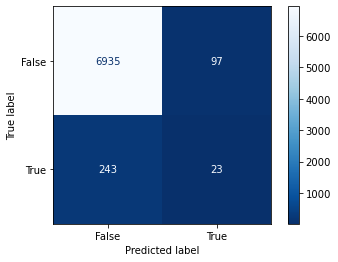

Classification Report for Stacking Classifier
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      7032
        True       0.19      0.09      0.12       266

    accuracy                           0.95      7298
   macro avg       0.58      0.54      0.55      7298
weighted avg       0.94      0.95      0.94      7298



In [39]:
#print confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=pipeline.classes_)
cm_display.plot(cmap='Blues_r')
print('Confusion Matrix for Stacking Classifier')
plt.show()

#print classification report
report = classification_report(y_test, y_pred)
print('Classification Report for Stacking Classifier')
print(report)

The model does considerably well for the negative classes (i.e. intubation = False), with an F1-score of 98%. However, it performs badly on the positive classes, misclassifying more than 80% of the true negatives and more than 90% of the true positives.

For this task of classifying patients who might possibly need intubation, we would want to prioritise <b>recall</b> since we do not want to miss out patients who truly needed intubation, and as a result, develop hypoxia and deteriorate further.

Precision-Recall Curve for Stacking Classifier


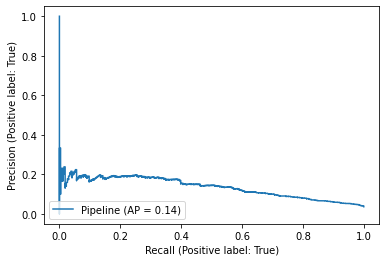

In [40]:
#print precision recall curve - to determine threshold to set
PrecisionRecallDisplay.from_estimator(pipeline, X_test_sel, y_test)
print('Precision-Recall Curve for Stacking Classifier')
plt.show()

Looking at the precision-recall curve, it might be possible to adjust the prediction threshold downwards and see if it improves the performance metrics.

Confusion Matrix for Stacking Classifier - adjusted threshold to 0.15


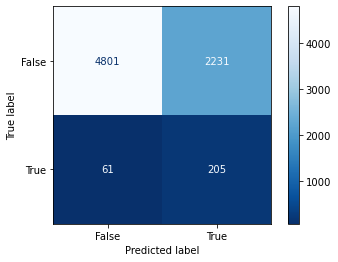

Classification Report for Stacking Classifier - adjusted threshold to 0.15
              precision    recall  f1-score   support

       False       0.99      0.68      0.81      7032
        True       0.08      0.77      0.15       266

    accuracy                           0.69      7298
   macro avg       0.54      0.73      0.48      7298
weighted avg       0.95      0.69      0.78      7298



In [44]:
#set threshold
threshold = 0.15
y_pred_adj = (y_proba[:,1] >= threshold).astype(bool)

#print new confusion matrix
matrix_adj = confusion_matrix(y_test, y_pred_adj, labels=pipeline.classes_)
cm_display_adj = ConfusionMatrixDisplay(confusion_matrix=matrix_adj, display_labels=pipeline.classes_)
cm_display_adj.plot(cmap='Blues_r')
print(f'Confusion Matrix for Stacking Classifier - adjusted threshold to {threshold}')
plt.show()

#print classification report
report_adj = classification_report(y_test, y_pred_adj)
print(f'Classification Report for Stacking Classifier - adjusted threshold to {threshold}')
print(report_adj)

As expected, reducing the probability threshold lower to 0.15 does improve the recall for positive classes, but at the cost of further precision. The AUROC curve for the adjusted threshold is shown below. 

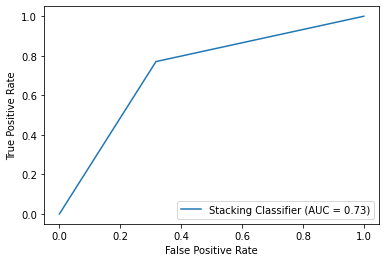

In [45]:
#plot AUROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_adj)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                              estimator_name='Stacking Classifier')
roc_display.plot()
plt.show()

In [46]:
#save model
import pickle
filename = 'assignment1_model.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

### Conclusion and Final Remarks
To recap and summarise, the primary aim of this project was to develop a prediction model to estimate the chance of intubation in ICU patients.

We pre-processed the data and developed the ensemble learning model in these broad steps:
1. Feature selection through removing features with large amounts of missing data, finding highly correlated features, and utilising LASSO regression.
2. Hyperparameter tuning with Randomised Search CV was performed to obtain optimal hyperparameters for different machine learning models
3. K-fold cross-validation was performed to determine the optimal ensemble learning model sequence.
4. Oversampling of the minority class (intubation=True) and undersampling of the majority class (intubation=False) was also conducted to address class imbalance.
5. Final model was developed using a Stacking ensemble learning method and evaluated for its performance.

From the model metrics, it is evident that the model's performance is modest at best, and further optimisation is necessary to improve the model predictions. Possible methods may include testing of more extensive feature selection methods, and also experimenting with different ensemble methods to strengthen the model predictions.